#**Mall Customers Clustering Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

**Reading the Dataset**

In [ ]:
# importing the dataset
data = pd.read_csv('/content/drive/MyDrive/SEM 4/UML/customers_clustering.zip (Unzipped Files)/Mall_Customers.csv')

## Examining Data

In [ ]:
# lets check the shape of the dataset
print("Shape of the dataset :", data.shape)

Shape of the dataset : (200, 5)


In [ ]:
# lets check the head of the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# lets check the tail of the data
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
# lets check sample of the data
data.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
84,85,Female,21,54,57
114,115,Female,18,65,48
82,83,Male,67,54,41


## Descriptive Statistics

In [ ]:
# describing the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# describing the categorical data
data.describe(include = 'object')

,Gender
count,200
unique,2
top,Female
freq,112


In [ ]:
# checking if there is any NULL data
data.isnull().any().any()

False

## Clustering Analysis

In [ ]:
# we want to perform clusters of Customers who share similar behaviour for that lets select the columns
# Spending score, and Annual Income

# lets import the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Lets select the Spending score, and Annual Income Columns from the Data
x = data.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

# let's check the shape of x
print(x.shape)

(200, 2)


In [ ]:
# lets also check the data, which we are going to use for the clustering analysis
x_data  = pd.DataFrame(x)
x_data.head()
# where o->Spending Score, and 1->Annual Income

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

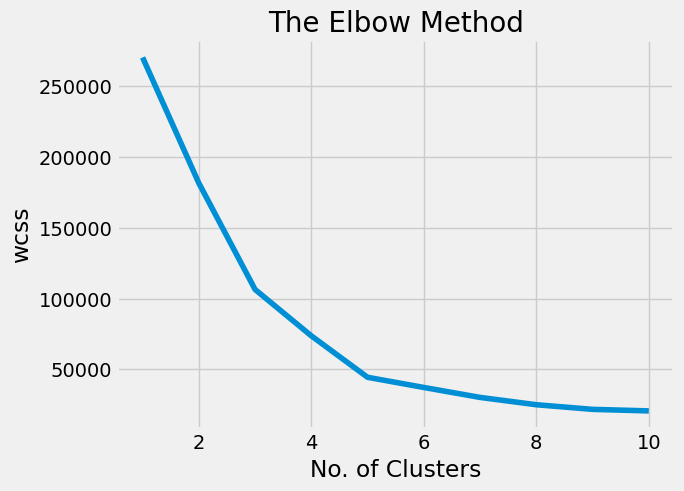

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

##S Score

In [ ]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

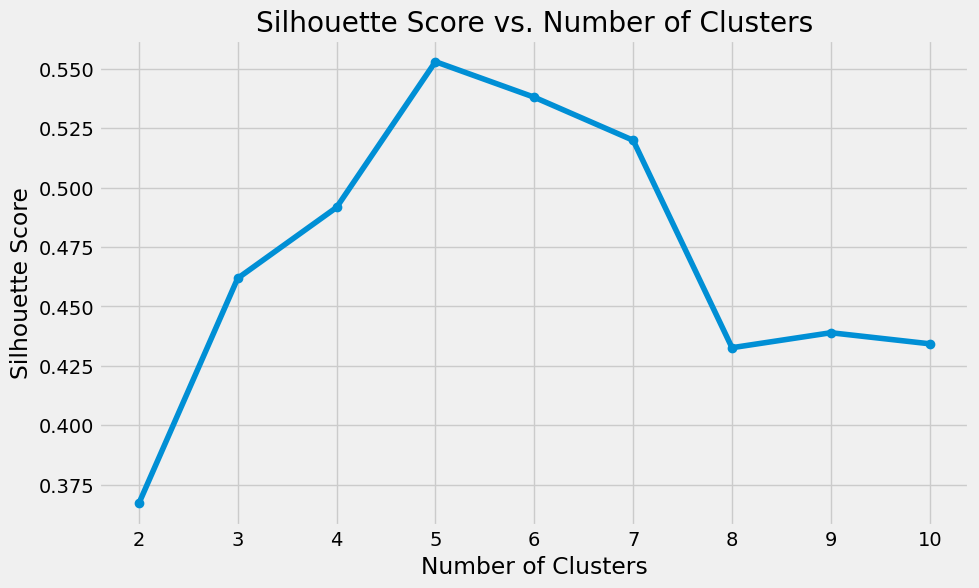

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
# Initialize lists to store silhouette scores and cluster numbers
silhouette_scores = []
cluster_numbers = []

# Define a range of cluster numbers to test
min_clusters = 2
max_clusters = 10

for n_clusters in range(min_clusters, max_clusters + 1):
    # Initialize Birch clustering with desired parameters
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)

    # Fit the model and predict cluster labels
    cluster_labels = agglomerative.fit_predict(x)

    # Calculate silhouette score for the clustering
    silhouette_avg = silhouette_score(x, cluster_labels)

    # Append silhouette score and cluster number to lists
    silhouette_scores.append(silhouette_avg)
    cluster_numbers.append(n_clusters)

# Plot the silhouette scores vs. cluster numbers
plt.figure(figsize=(10, 6))
plt.plot(cluster_numbers, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(cluster_numbers)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=5, linkage='ward')
agglomerative_labels = agglomerative.fit_predict(x)
agglomerative_score = silhouette_score(x, agglomerative_labels)

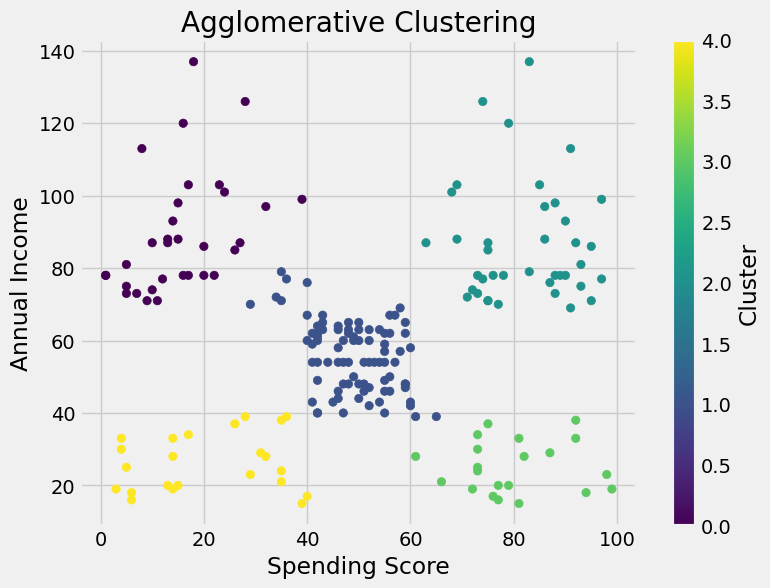

In [ ]:
# Visualize clusters on a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=agglomerative_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.colorbar(label='Cluster')
plt.show()

# Dataset Description

###Context


**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Content




**Attributes**

**People**

**ID:** Customer's unique identifier   
**Year_Birth:** Customer's birth year   
**Education:** Customer's education level   
**Marital_Status:** Customer's marital status  
**Income:** Customer's yearly household income  
**Kidhome:** Number of children in customer's household  
**Teenhome:** Number of teenagers in customer's household  
**Dt_Customer:**Date of customer's enrollment with the company  
**Recency:** Number of days since customer's last purchase  
**Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

**MntWines:** Amount spent on wine in last 2 years  
**MntFruits:** Amount spent on fruits in last 2 years  
**MntMeatProducts:** Amount spent on meat in last 2 years  
**MntFishProducts:** Amount spent on fish in last 2 years  
**MntSweetProducts:** Amount spent on sweets in last 2 years  
**MntGoldProds:** Amount spent on gold in last 2 years

**Promotion**

**NumDealsPurchases:** Number of purchases made with a discount   
**AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
**AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
**AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise    
**AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise   
**AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise    
**Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

**NumWebPurchases:** Number of purchases made through the company’s website  
**NumCatalogPurchases:** Number of purchases made using a catalogue  
**NumStorePurchases:** Number of purchases made directly in stores   
**NumWebVisitsMonth:** Number of visits to company’s website in the last month


### Target


Need to perform clustering to summarize customer segments.

# CODE

## DPL

importing libraries

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
pd.set_option('display.max_columns',40)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/SEM 4/UML/DATASET/marketing_campaign.csv",sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [ ]:
dates = pd.to_datetime(dates)

# Calculate the number of days since the newest customer
data["Customer_For"] = (dates.max() - dates).days

# Ensure the "Customer_For" column contains numeric values
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [ ]:
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"]
data = data.drop(to_drop, axis=1)

In [ ]:
data.head()

,ID,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663,64,1617,Alone,0,1,0
1,2174,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113,67,27,Alone,2,3,1
2,4141,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312,56,776,Partner,0,2,0
3,6182,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139,37,53,Partner,1,3,1
4,5324,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161,40,422,Partner,1,3,1


In [ ]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]

In [ ]:
from sklearn.preprocessing import LabelEncoder

s = (data.dtypes == 'object')
object_cols = list(s[s].index)

LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [ ]:
from sklearn.preprocessing import StandardScaler
ds = data.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2212.0,-8.994212e-17,2.878610,-5.981311,-2.540562,-0.782426,2.386105,7.452993
1,2212.0,2.569775e-17,1.709592,-4.206283,-1.329270,-0.168518,1.223451,6.166015
2,2212.0,5.219855e-18,1.232366,-3.708107,-0.853966,-0.056471,0.854231,6.671054


In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.34511035, 0.4668347 , 0.53008528])

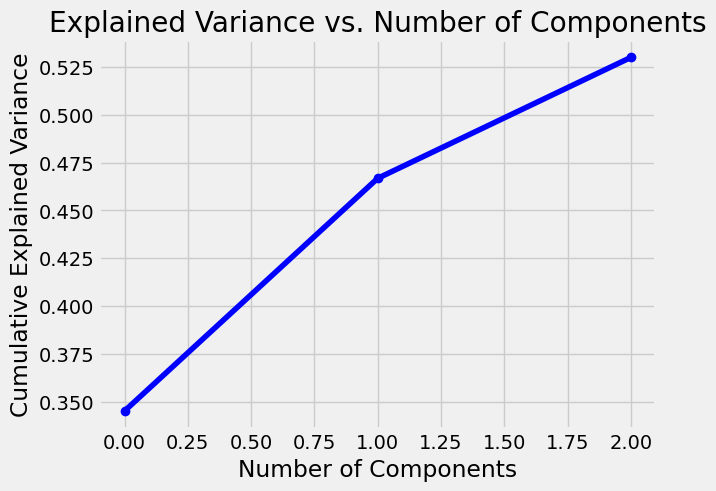

In [ ]:
# Plot cumulative explained variance
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
PCA_ds.head()

,0,1,2
0,4.986397,-0.160633,2.439349
1,-2.871576,0.037967,-1.466183
2,2.616826,-0.725395,-0.242411
3,-2.655056,-1.458890,-0.414332
4,-0.655778,0.179749,-0.126136


## Clustering

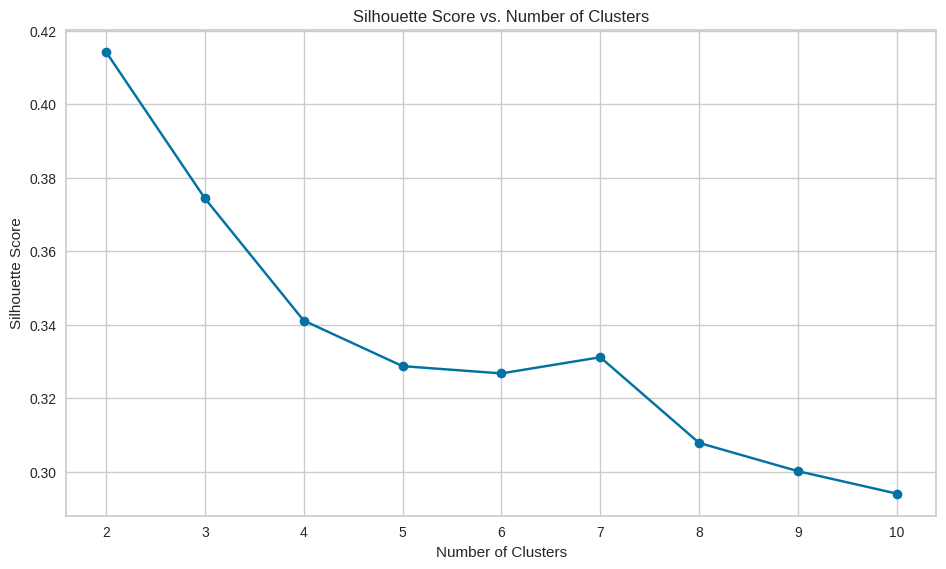

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
# Initialize lists to store silhouette scores and cluster numbers
silhouette_scores = []
cluster_numbers = []

# Define a range of cluster numbers to test
min_clusters = 2
max_clusters = 10

for n_clusters in range(min_clusters, max_clusters + 1):
    # Initialize Birch clustering with desired parameters
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)

    # Fit the model and predict cluster labels
    cluster_labels = agglomerative.fit_predict(PCA_ds)

    # Calculate silhouette score for the clustering
    silhouette_avg = silhouette_score(PCA_ds, cluster_labels)

    # Append silhouette score and cluster number to lists
    silhouette_scores.append(silhouette_avg)
    cluster_numbers.append(n_clusters)

# Plot the silhouette scores vs. cluster numbers
plt.figure(figsize=(10, 6))
plt.plot(cluster_numbers, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(cluster_numbers)
plt.grid(True)
plt.show()

## Agglomerative Clustering

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglomerative_labels = agglomerative.fit_predict(PCA_ds)
PCA_ds['Clusters'] = agglomerative_labels
data['Clusters'] = agglomerative_labels
agglomerative_score = silhouette_score(PCA_ds, agglomerative_labels)

In [ ]:
import plotly.graph_objects as go

x = PCA_ds[0]
y = PCA_ds[1]
z = PCA_ds[2]
c = PCA_ds['Clusters']
fig = go.Figure()
scatter = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=6,
        color=c,
        colorscale='Viridis',
        opacity=0.8
    ),
    name='Data Points'
)
fig.add_trace(scatter)
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)
        )
    ),
    title='3D Scatter Plot of PCA-transformed Data'
)
fig.show()

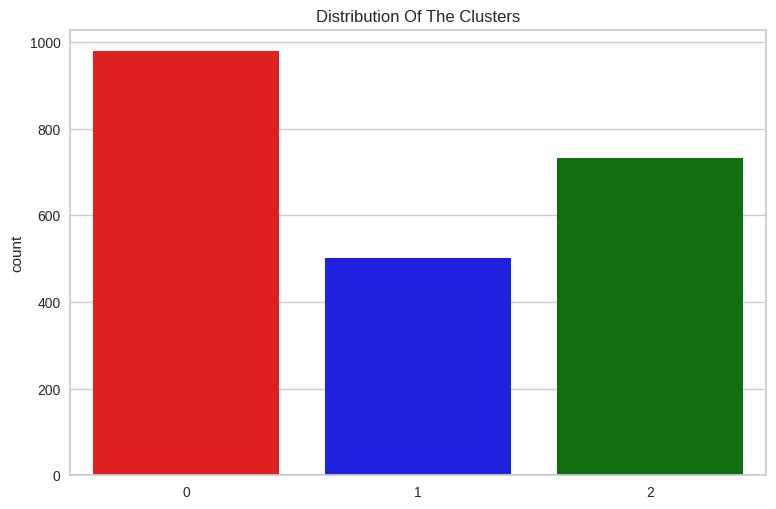

In [ ]:
pal = ["red","blue", "green","orange"]
pl = sns.countplot(x=agglomerative_labels,palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

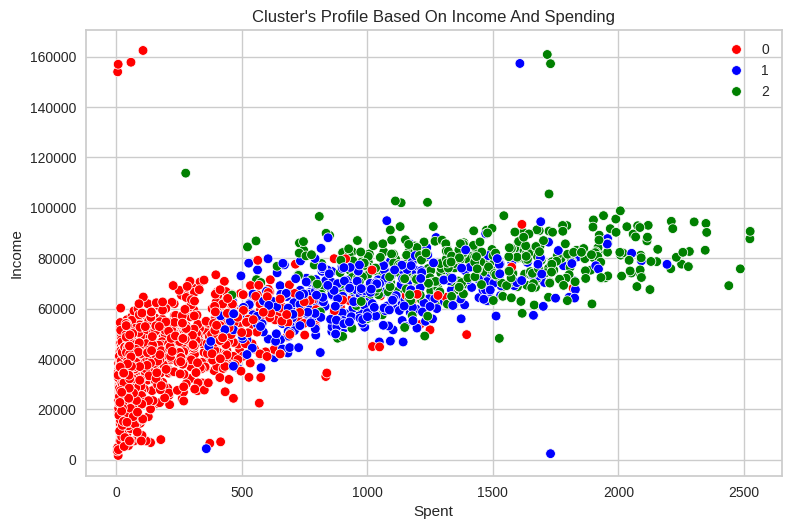

In [ ]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"],palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

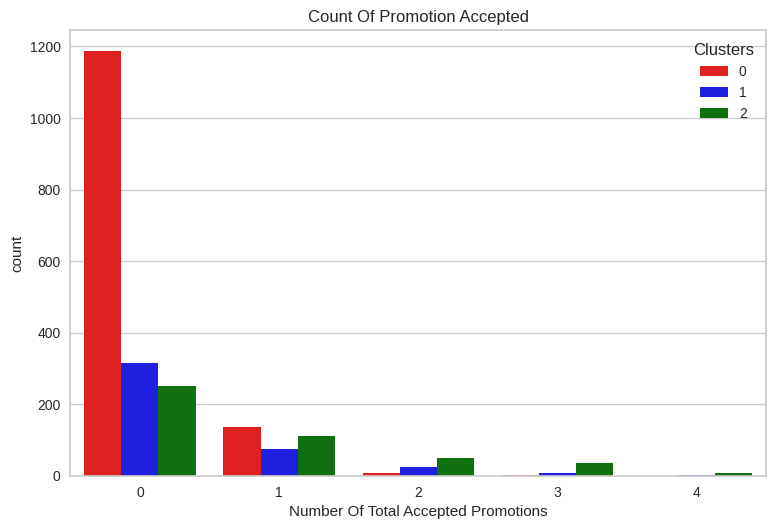

In [ ]:
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

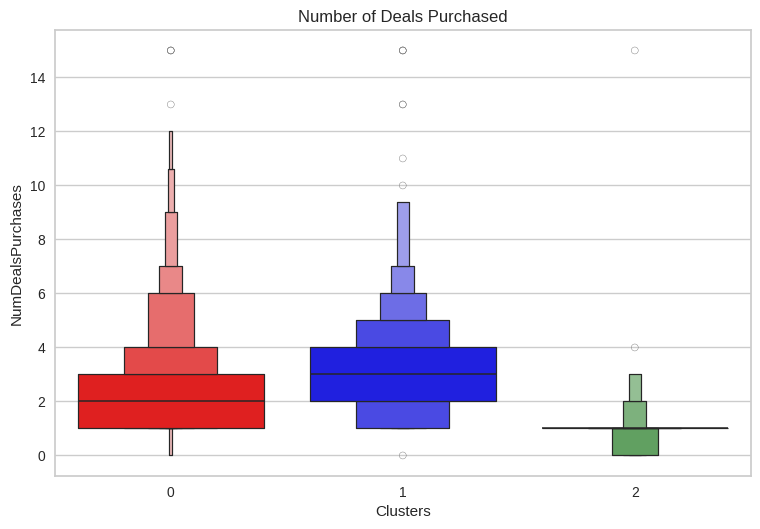

In [ ]:
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 800x550 with 0 Axes>

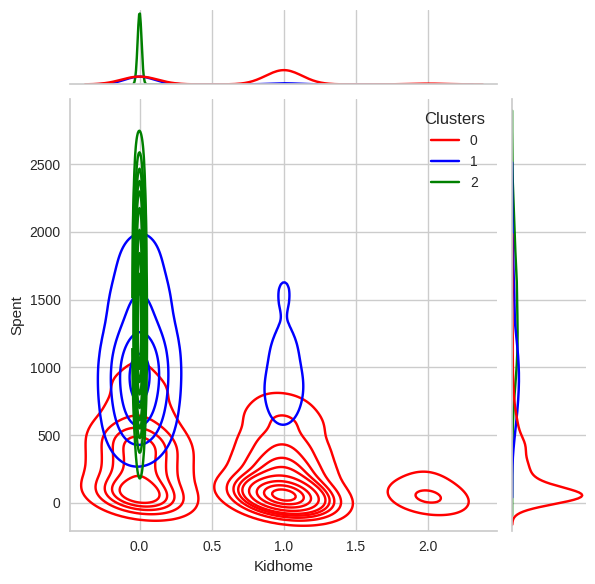

<Figure size 800x550 with 0 Axes>

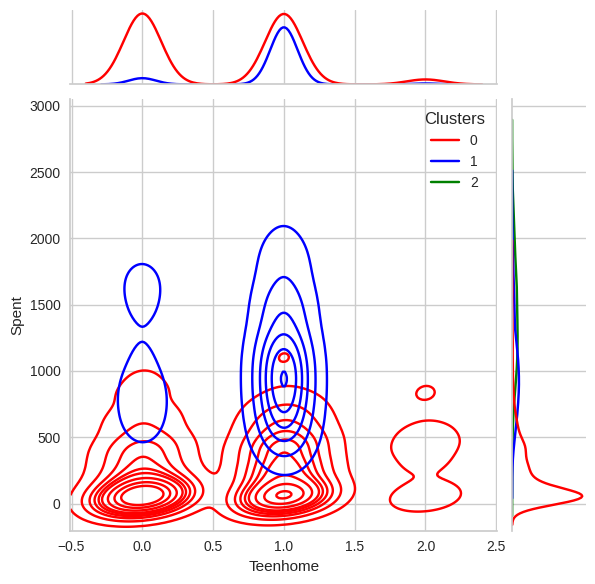

<Figure size 800x550 with 0 Axes>

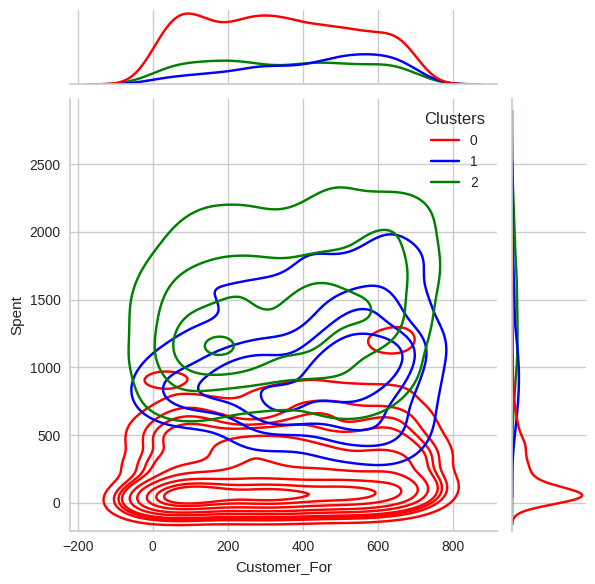

<Figure size 800x550 with 0 Axes>

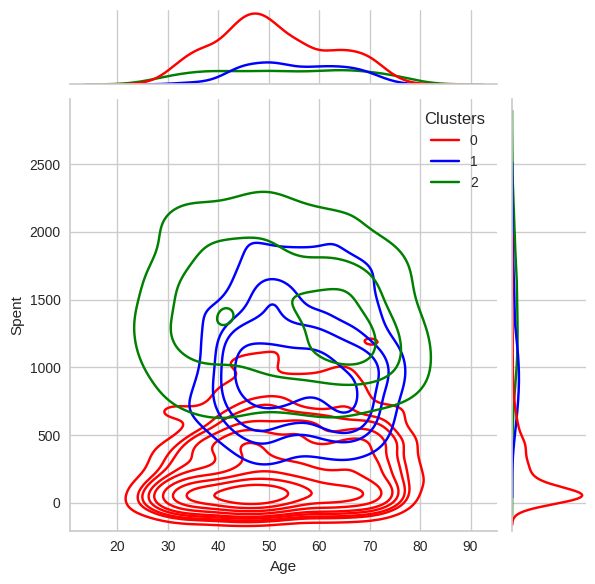

<Figure size 800x550 with 0 Axes>

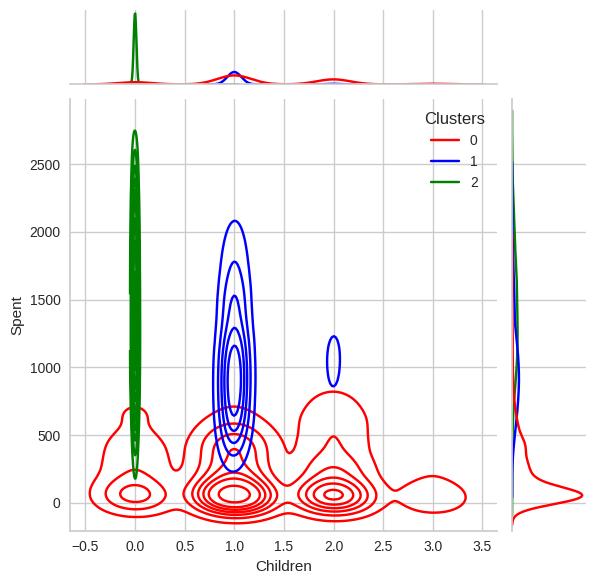

<Figure size 800x550 with 0 Axes>

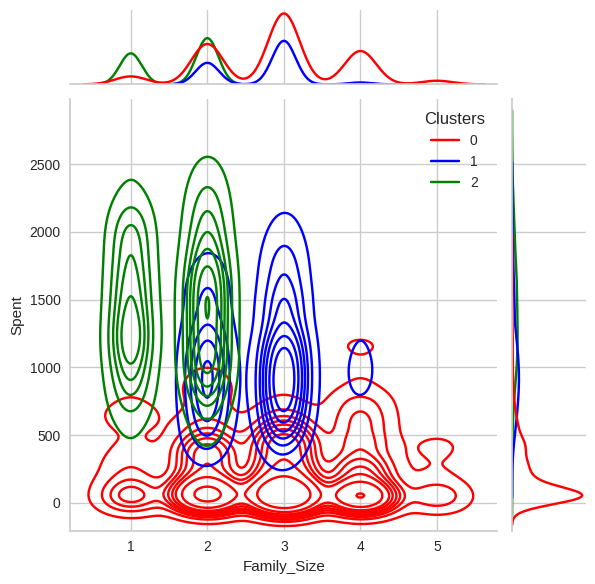

<Figure size 800x550 with 0 Axes>

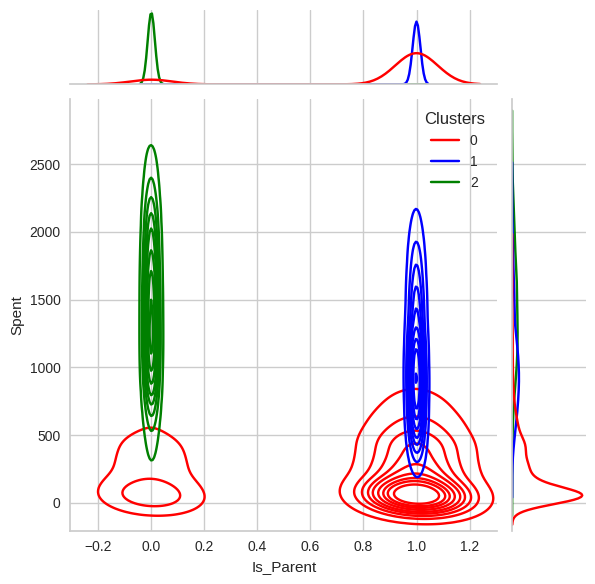

<Figure size 800x550 with 0 Axes>

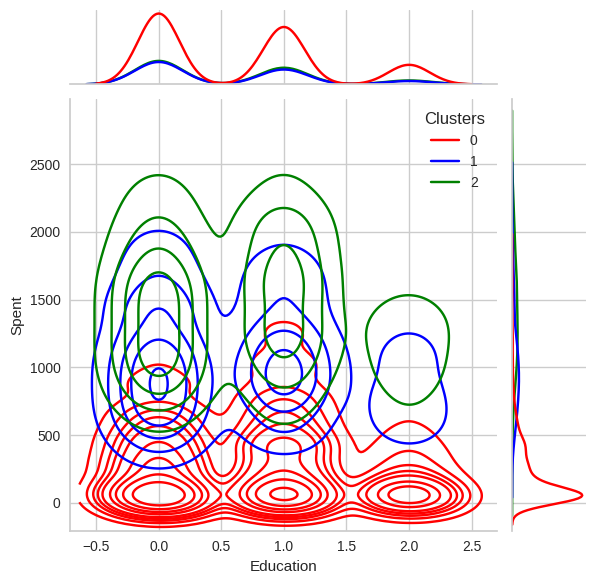

<Figure size 800x550 with 0 Axes>

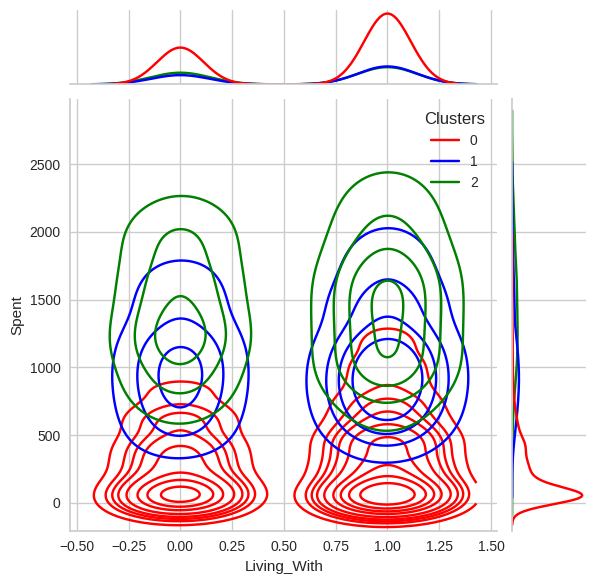

<Figure size 800x550 with 0 Axes>

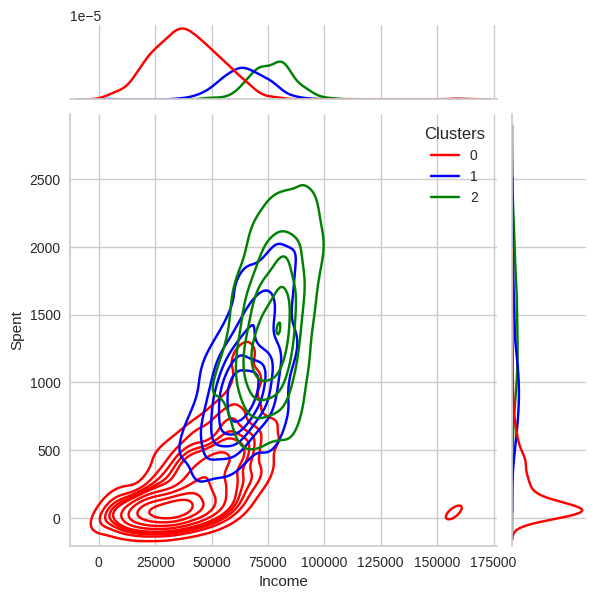

In [ ]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With","Income"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

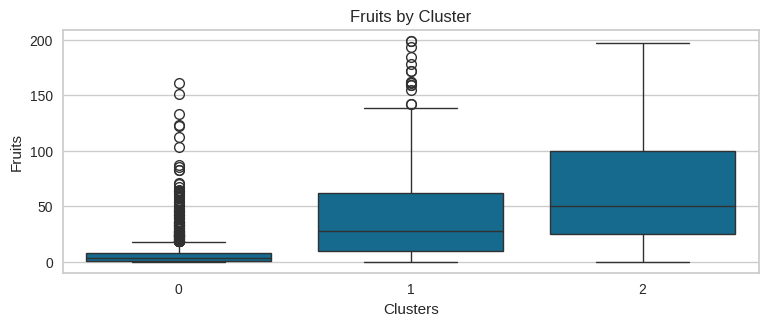

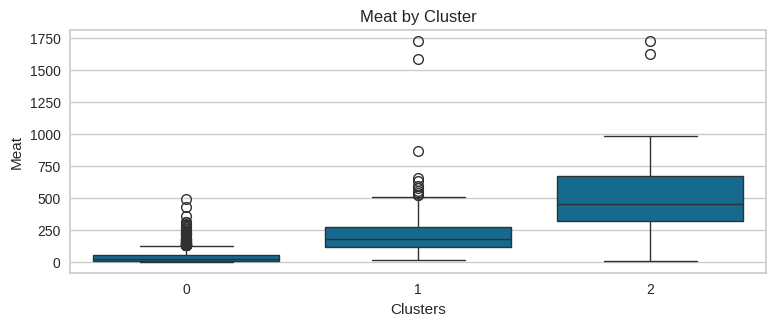

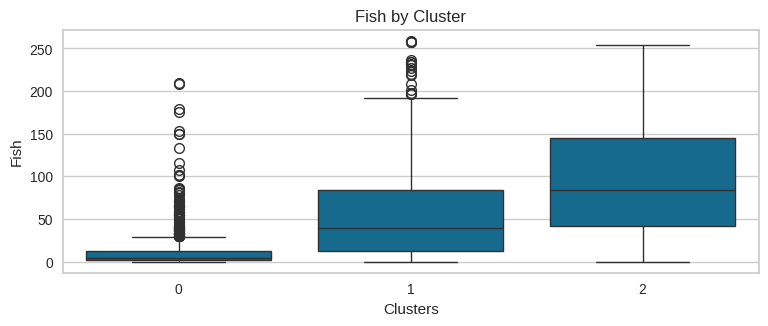

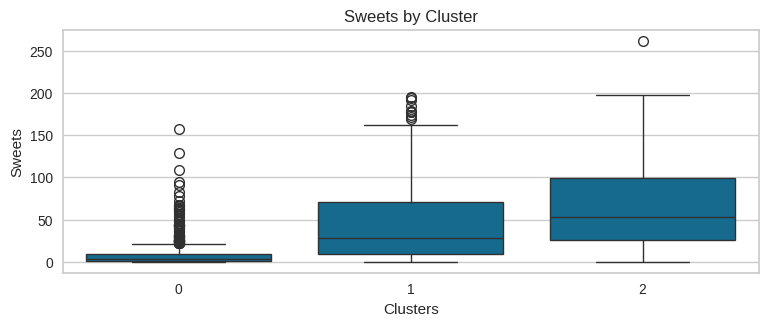

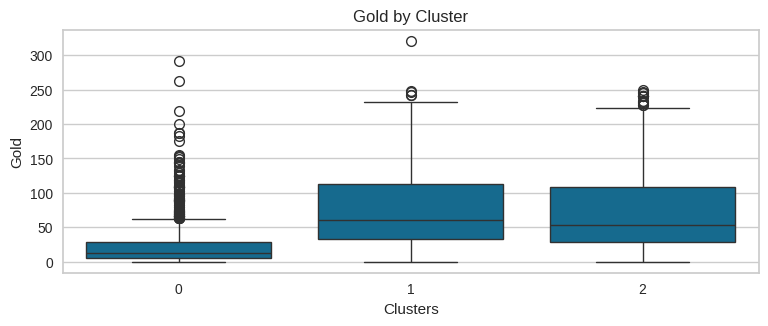

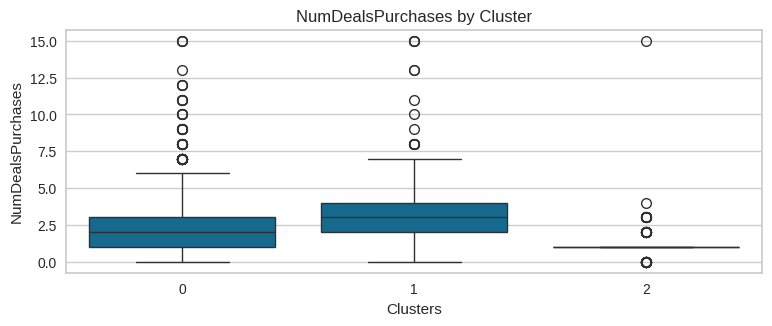

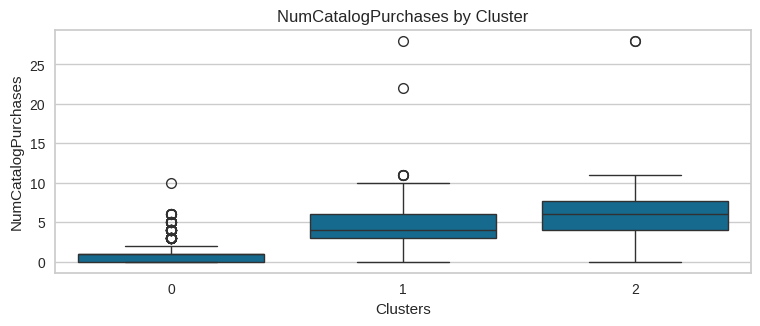

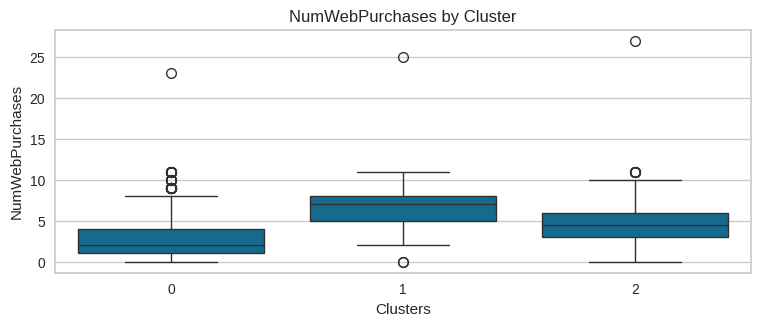

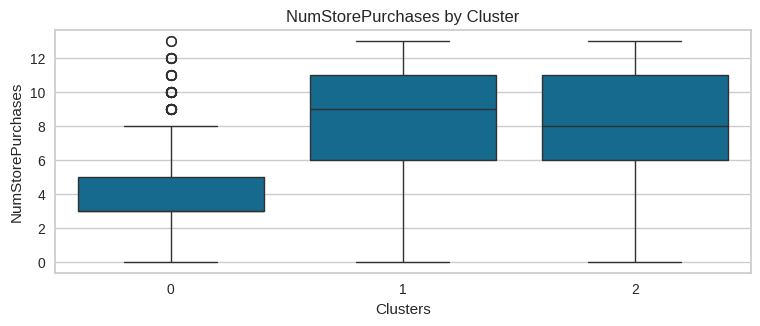

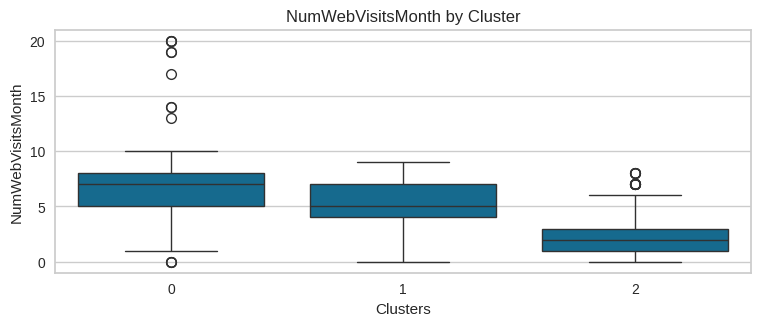

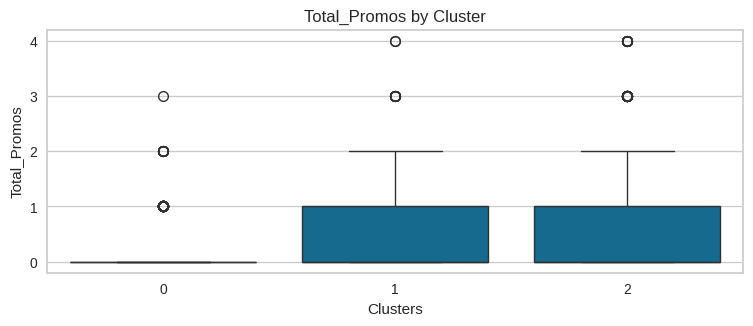

In [ ]:
col_to_analyze = ['Fruits','Meat','Fish','Sweets','Gold','NumDealsPurchases','NumCatalogPurchases','NumWebPurchases',
                 'NumStorePurchases','NumWebVisitsMonth','Total_Promos']
for i in col_to_analyze:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x='Clusters', y=i, data=data)
    plt.title(f'{i} by Cluster')
    plt.show()

## Inferences

**Group 0 :**

Majority are parents  
Maximum one child (not a teenager)   
Family size: 1 to 2 members   
Age: 25 to 50   
Low income, low spending habits   


**Group 1 :**

Definitely not a parent   
No children   
Family size: 1 to 2 members   
Age: 25 to 75   
High income, high spending habits   


**Group 2 :**

Definitely a parent   
Mostly no more than one child or one teenager   
Family size: 2 to 4 members    
Age: 40 to 70   

**Group 3 :**

Average income, but high spending habits    
More than one child, teenager, or kid    
Family size: 3 to 5 members    
Age: 45 to 75   
Low income, low spending habits   